In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. (https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers)

Also, we build logistic model and convert model lanuage to human readble language to interpret the customer behavior to keep customer away from churn

Logit(Exited = 1) = -0.06367794 + 0.751*Age - 0.52*IsActiveMember - 0.2591*Gender + 0.228*Geo_Germany + 0.162*Balance - 0.12*Geo_Farance - 0.089*Geo_Spain - 0.0637 * CreditScore - 0.0586*NumOfProdcuts - 0.0452*Tenure - 0.0199*HasCrCard + 0.0137*Salary + 0.0137*EstimatedSalary

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Model Extra Functionality](#Part-4:-Model-Extra-Functionality)

# Part 0: Package Import and Data Load
check this [link](https://colab.research.google.com/notebooks/io.ipynb) for more info

In [2]:
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

In [3]:
import pandas as pd
df = pd.read_csv('bank_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [4]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# check the unique values for each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [31]:
# Get target variable
y = df['Exited']

In [39]:
print('we have ' + str(df[df['Exited'] == 1].shape[0]/df.shape[0] * 100) + "% exited customer in this dataset")

we have 20.369999999999997% exited customer in this dataset


### Part 1.2:  Understand the features

In [7]:
# check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [18]:
df_numerics_only.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

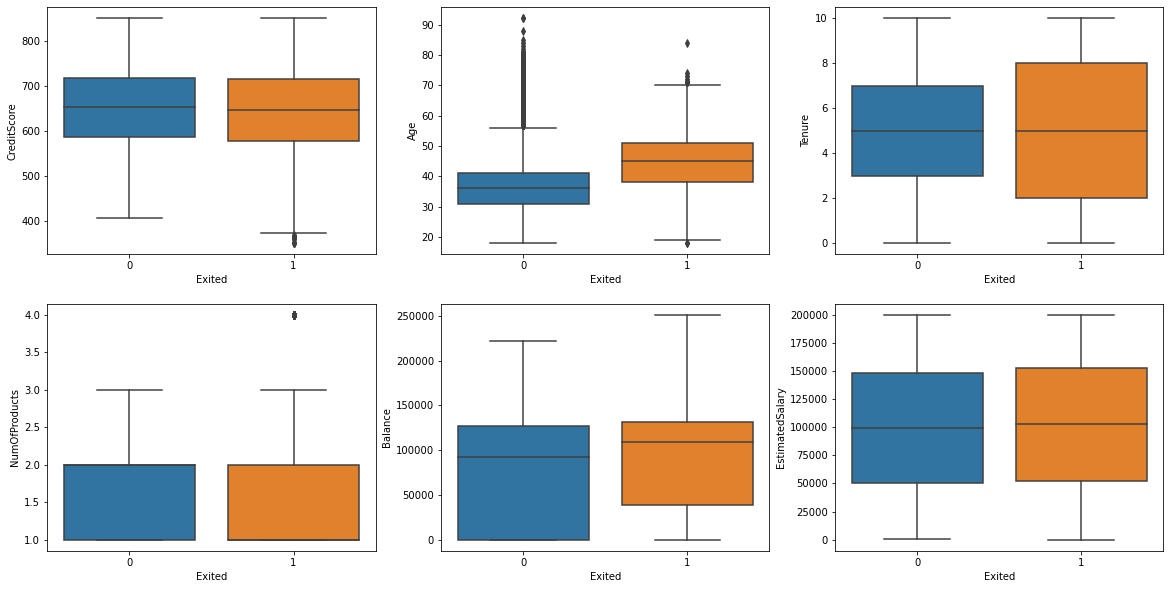

In [17]:
_,axss = plt.subplots(2,3, figsize=[20,10])

cols = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']

for i in range(len(cols)):
    row_num = i // 3
    col_num = i % 3
    sns.boxplot(x ='Exited', y = cols[i], data = df, ax = axss[row_num][col_num])    


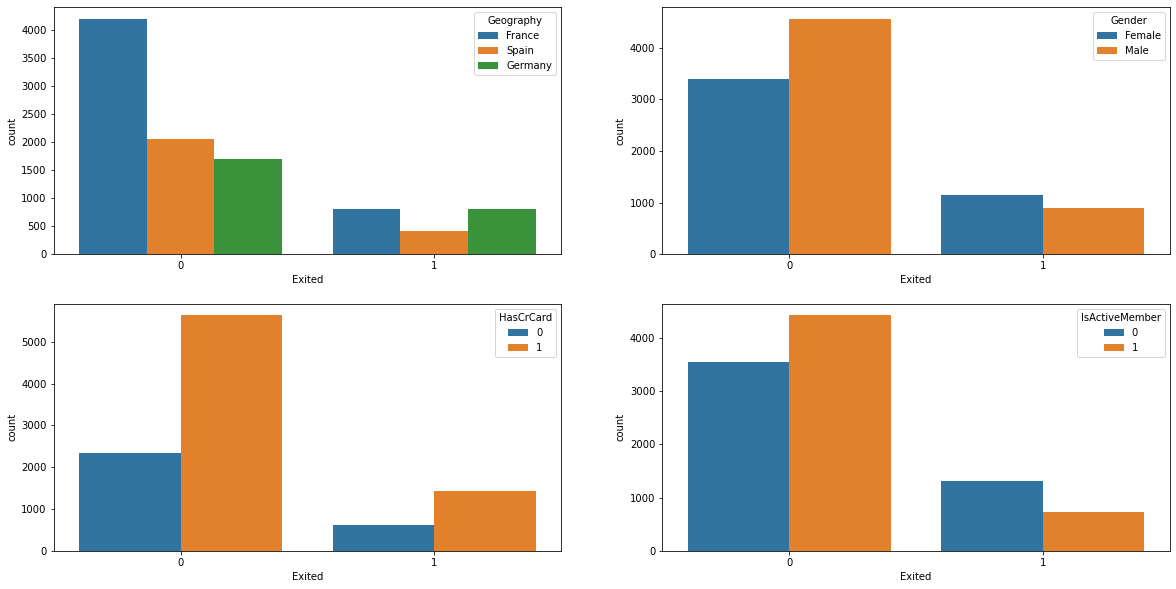

In [20]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize = [20,10])
sns.countplot(x = 'Exited', hue = 'Geography', data = df, ax = axss[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = df, ax = axss[0][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = df, ax = axss[1][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = df, ax = axss[1][1])

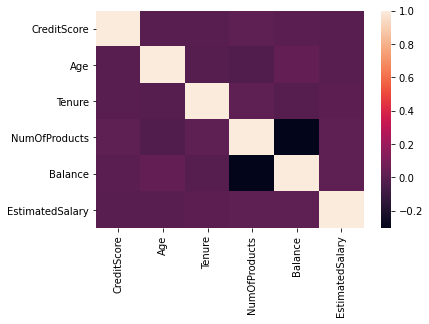

In [21]:
# correlations between features
corr_score = df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [22]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000,-0.004,0.001,0.012,0.006,-0.001
Age,-0.004,1.000,-0.010,-0.031,0.028,-0.007
Tenure,0.001,-0.010,1.000,0.013,-0.012,0.008
NumOfProducts,0.012,-0.031,0.013,1.000,-0.304,0.014
Balance,0.006,0.028,-0.012,-0.304,1.000,0.013
EstimatedSalary,-0.001,-0.007,0.008,0.014,0.013,1.000


# Part 2: Feature Preprocessing

In [24]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = df.drop(to_drop, axis=1)

In [25]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100


In [26]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [27]:
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [28]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [29]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

Split dataset

In [42]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')


training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [52]:
# One hot encoding
# another way: get_dummies
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[['Geography']])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)


In [53]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.000,1,0,1,79408.170,0.000,0.000,1.000
1,708,Female,23,4,71433.080,1,1,0,103697.570,0.000,1.000,0.000
2,548,Female,37,9,0.000,2,0,0,98029.580,1.000,0.000,0.000
3,645,Female,48,7,90612.340,1,1,1,149139.130,1.000,0.000,0.000
4,729,Female,45,7,91091.060,2,1,0,71133.120,0.000,0.000,1.000


In [54]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [55]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.000,42,10,0.000,1,0,1,79408.170,0.000,0.000,1.000
1,708,0.000,23,4,71433.080,1,1,0,103697.570,0.000,1.000,0.000
2,548,0.000,37,9,0.000,2,0,0,98029.580,1.000,0.000,0.000
3,645,0.000,48,7,90612.340,1,1,1,149139.130,1.000,0.000,0.000
4,729,0.000,45,7,91091.060,2,1,0,71133.120,0.000,0.000,1.000


Standardize/Normalize Data

In [56]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [57]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.173,1.000,0.289,1.731,-1.219,-0.913,-1.542,0.968,-0.352,0.000,0.000,1.000
1,0.602,0.000,-1.509,-0.341,-0.077,-0.913,0.648,-1.033,0.072,0.000,1.000,0.000
2,-1.052,0.000,-0.184,1.386,-1.219,0.796,-1.542,-1.033,-0.027,1.000,0.000,0.000
3,-0.049,0.000,0.857,0.695,0.230,-0.913,0.648,0.968,0.866,1.000,0.000,0.000
4,0.820,0.000,0.573,0.695,0.237,0.796,0.648,-1.033,-0.497,0.000,0.000,1.000


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [58]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [59]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [60]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8088

### Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [63]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [64]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.1)('l1', 1) ('l1', 5) ('l1', 10)('l1', 100)
# ('12', 0.1)('l2', 1) ('l2', 5) ('l2', 10)('l2', 100)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10,100)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 1, 5, 10, 100), 'penalty': ('l1', 'l2')})

In [65]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [66]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [67]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
best_LR_model.score(X_test, y_test)

0.8092

#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [69]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [70]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8433333333333334
Best parameters set:
n_neighbors:9


In [71]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [72]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [73]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8657333333333334
Best parameters set:
max_depth:10
n_estimators:100


In [74]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [75]:
best_RF_model

RandomForestClassifier(max_depth=10)

####Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [78]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8612
precision is: 0.8
recall is: 0.4243614931237721

Logistic Regression
Accuracy is: 0.8092
precision is: 0.5963855421686747
recall is: 0.1944990176817289

K nearest neighbor
Accuracy is: 0.8428
precision is: 0.7283464566929134
recall is: 0.36345776031434185



### Part 3.4: Model Evaluation - ROC & AUC

#### Part 3.4.1: ROC of RF Model

In [90]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

from sklearn import metrics
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8448766008926218

#### Part 3.4.1: ROC of LR Model

In [89]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)


# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7722028104860872

In [94]:
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.7986385690420251

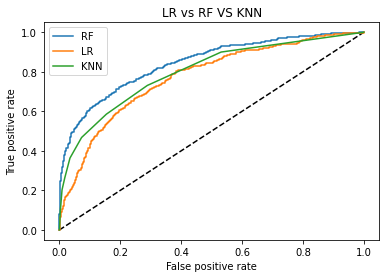

In [96]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR vs RF VS KNN')
plt.legend(loc='best')
plt.show()

# Part 4: Model Extra Functionality

### Part 4.1:  Logistic Regression Model

The corelated features that we are interested in

In [97]:
X_with_corr = X.copy()

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography'])
X_with_corr['Gender'] = enc_oe.transform(X_with_corr[['Gender']])
X_with_corr['SalaryInRMB'] = X_with_corr['EstimatedSalary'] * 6.4
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,0.000,42,2,0.000,1,1,1,101348.880,1.000,0.000,0.000,648632.832
1,608,0.000,41,1,83807.860,1,0,1,112542.580,0.000,0.000,1.000,720272.512
2,502,0.000,42,8,159660.800,3,1,0,113931.570,1.000,0.000,0.000,729162.048
3,699,0.000,39,1,0.000,2,0,0,93826.630,1.000,0.000,0.000,600490.432
4,850,0.000,43,2,125510.820,1,1,1,79084.100,0.000,0.000,1.000,506138.240


In [98]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7307
IsActiveMember : -0.5046
Geography_Germany : 0.3121
Gender : -0.2409
Balance : 0.1509
CreditScore : -0.0457
NumOfProducts : -0.0439
Tenure : -0.0271
SalaryInRMB : 0.0061
Geography_France : -0.0043
EstimatedSalary : 0.0031
HasCrCard : -0.0022
Geography_Spain : 0.0


In [99]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


In [104]:
LRmodel_l2.coef_[0]

array([-0.06367794, -0.25913053,  0.75099022, -0.04520424,  0.16199493,
       -0.0585934 , -0.01993898, -0.52716425,  0.01367085, -0.12070832,
        0.22788348, -0.08904964,  0.01367085])

### Part 4.2:  Logistic Regression Model Interpret
- **The model we get**:
- Logit(Exited = 1) = -0.06367794 + 0.751*Age - 0.52*IsActiveMember - 0.2591*Gender + 0.228*Geo_Germany + 0.162*Balance - 0.12*Geo_Farance - 0.089*Geo_Spain - 0.0637 * CreditScore - 0.0586*NumOfProdcuts - 0.0452*Tenure - 0.0199*HasCrCard + 0.0137*Salary + 0.0137*EstimatedSalary




- **Insight summary**
- If the age of customer increase by one unit, the odds of exited will increase by exp(0.75) = 2.117 
- we also observe one interesting things: we are supposed to get focus on the customer with high balance account, which means these clients may be more likely to churn compared with low balance, same thing for customer with high Estimated Salary
- Customer from Germany churn more than other country customers